In [1]:
!rm bank-full.csv
!wget https://raw.githubusercontent.com/bdm-unlu/2021/main/TPs/TP05/TP0501/bank-full.csv

rm: cannot remove 'bank-full.csv': No such file or directory
--2021-10-25 21:10:10--  https://raw.githubusercontent.com/bdm-unlu/2021/main/TPs/TP05/TP0501/bank-full.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4610348 (4.4M) [text/plain]
Saving to: ‘bank-full.csv’

bank-full.csv       100%[===================>]   4.40M  --.-KB/s    in 0.03s   

2021-10-25 21:10:10 (172 MB/s) - ‘bank-full.csv’ saved [4610348/4610348]



In [2]:
import pandas as pd 

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn import preprocessing

import graphviz

le = preprocessing.LabelEncoder()

In [3]:
bank = pd.read_csv("bank-full.csv", delimiter=";") 

bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
feature_names = list(bank.columns)
feature_names.remove("y")
feature_names

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [5]:
features = bank[feature_names]
features

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown


In [6]:
le.fit(bank.y)
target_names = le.classes_
target_names

array(['no', 'yes'], dtype=object)

In [7]:
target = bank.y
target

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [8]:
#Paso las features a continuas
for column_name in features.columns:
  if (features[column_name].dtype == object):
    features[column_name] = le.fit_transform(features[column_name])

features

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


Accuracy: 0.8933982085591065
Depth: 10


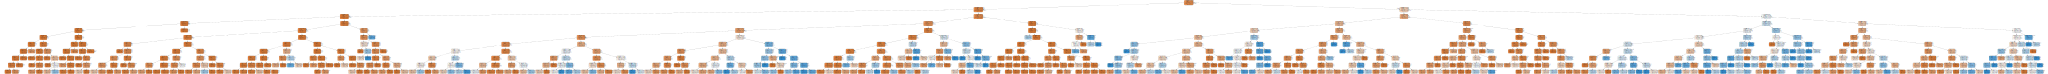

In [59]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0, test_size=0.2)

arbol_parametrizado = tree.DecisionTreeClassifier(criterion="entropy", max_depth=10, min_samples_leaf=5)
arbol_parametrizado = arbol_parametrizado.fit(X_train,y_train)
y_pred = arbol_parametrizado.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Depth:",arbol_parametrizado.get_depth())


dot_data = tree.export_graphviz(arbol_parametrizado, out_file=None,
                                feature_names=feature_names,
                                class_names=target_names,
                                filled=True, rounded=True,
                                special_characters=True)  
#Capturo el source
graph = graphviz.Source(dot_data)

# Muestro el contenido de graph
graph

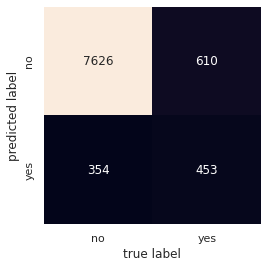

In [60]:


import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

species = np.array(y_test)
predictions = np.array(y_pred)

mat = metrics.confusion_matrix(species, predictions)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_names, yticklabels=target_names)

plt.xlabel('true label')
plt.ylabel('predicted label');

